In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import wb
import datetime as dt

In [60]:
%matplotlib inline

In [169]:
f = wb.download(indicator='NY.GDP.MKTP.CD', country=['JP'],
                start=1960, end=2010)
f = f.unstack(level=0)
f.columns = ['GDP at market prices (current US$)']
f.head(2)

,GDP at market prices (current US$)
year,
1960,4.430734e+10
1961,5.350862e+10


In [170]:
f2 = wb.download(indicator='NY.GDP.PCAP.CD', country=['JP'],
                start=1960, end=2010)
f2 = f2.unstack(level=0)
f2.columns = ['GDP per capita (current US$)']
f2.head(2)

,GDP per capita (current US$)
year,
1960,478.99534
1961,563.58676


In [171]:
f3 = wb.download(indicator='SP.DYN.LE00.IN', country=['JP'],
                start=1960, end=2010)
f3 = f3.unstack(level=0)
f3.columns = ['Life expectancy at birth']
f3.head(2)

,Life expectancy at birth
year,
1960,67.666098
1961,68.310000


In [192]:
f4 = pd.concat([f, f2], axis=1)
f4.head(3)

,GDP at market prices (current US$),GDP per capita (current US$)
year,,
1960,4.430734e+10,478.995340
1961,5.350862e+10,563.586760
1962,6.072302e+10,633.640315


In [52]:
import matplotlib.pyplot as plt

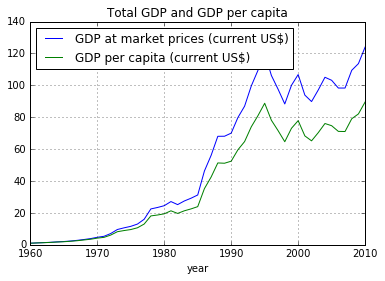

In [164]:
f4['GDP at market prices (current US$)'] /= f4['GDP at market prices (current US$)'][0]
f4['GDP per capita (current US$)'] /= f4['GDP per capita (current US$)'][0]
f4.plot(title='Total GDP and GDP per capita', grid=True)
plt.show()

In [188]:
f5 = pd.concat([f2, f3], axis=1)
f5.head(3)

,GDP per capita (current US$),Life expectancy at birth
year,,
1960,478.995340,67.666098
1961,563.586760,68.310000
1962,633.640315,68.594878


In [205]:
GDP=f['GDP at market prices (current US$)']
GDPPC=f2['GDP per capita (current US$)']
LE=f3['Life expectancy at birth']

C:\Users\聡\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5).corr(other=<Series>)
  if __name__ == '__main__':


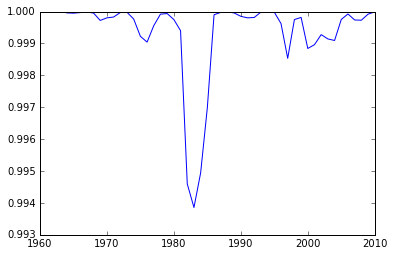

In [223]:
roll_cor=pd.rolling_corr(GDP, GDPPC, window=5)

plt.plot(roll_cor)
plt.show()

C:\Users\聡\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5).corr(other=<Series>)
  if __name__ == '__main__':


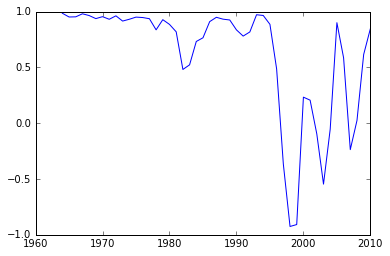

In [224]:
roll_cor=pd.rolling_corr(GDP, LE, window=5)

plt.plot(roll_cor)
plt.show()